# Explore News Sentiments

In [118]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Imports

In [149]:
import os
import warnings

# Import necessary libraries
import numpy as numpy
import pandas as pd
from data.load_data import load_local_data
from eda.data_quality_utils import DataQualityUtils
from eda.textual_eda import TextualEDA
from eda.visualizer import DataVisualizer

In [150]:
warnings.filterwarnings("ignore", category=FutureWarning)

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [120]:
# Load the stock news sentiment data
df = load_local_data("../raw/raw_analyst_ratings.csv")
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/raw_analyst_ratings.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (1407328, 6)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Inspecting Dataset

In [121]:
#view sample data
df.sample(10)

,Unnamed: 0,headline,url,publisher,date,stock
202437,203616,PreMarket Opening NYSE Imbalance Update: Squar...,https://www.benzinga.com/pre-market-outlook/18...,Paul Quintaro,2018-02-01 00:00:00,C
764946,768833,Legg Mason Spokesperson Says No News Related t...,https://www.benzinga.com/news/12/02/2331954/le...,Charles Gross,2012-02-09 00:00:00,LM
82384,83143,"AOL Names Stephen Bromberg Executive Editor, A...",https://www.benzinga.com/news/11/01/765523/aol...,Benzinga Staff,2011-01-10 00:00:00,AOL
1137206,1142796,16 Consumer Cyclical Stocks Moving In Tuesday'...,https://www.benzinga.com/pre-market-outlook/20...,Benzinga Insights,2020-04-28 00:00:00,SIX
149238,150277,The Daily Biotech Pulse: Verastem's Chinese Du...,https://www.benzinga.com/general/biotech/18/09...,Shanthi Rexaline,2018-09-26 00:00:00,BDX
592129,595243,BMO Capital Highlights This Week's MedTech Ear...,https://www.benzinga.com/analyst-ratings/analy...,Taylor Cox,2016-08-01 00:00:00,HAE
1233300,1239160,Top 4 Stocks In The Auto Manufacturers-Major I...,https://www.benzinga.com/trading-ideas/14/07/4...,Monica Gerson,2014-07-08 00:00:00,TM
1275561,1281666,Yield Curve Normalization Lifts Leveraged Bond...,https://www.benzinga.com/trading-ideas/long-id...,ETF Professor,2019-04-08 09:32:11-04:00,TYD
571196,574225,"Benzinga's Top Upgrades, Downgrades For Septem...",https://www.benzinga.com/analyst-ratings/upgra...,Lisa Levin,2017-09-21 00:00:00,GPRK
617770,620964,96 Stocks Moving In Wednesday's Mid-Day Session,https://www.benzinga.com/news/20/03/15582552/9...,Lisa Levin,2020-03-18 00:00:00,HMY


In [122]:
#see the last rows
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [123]:
#shape of the dataset
df.shape

(1407328, 6)

In [124]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [125]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1407328.0,707245.39645,408100.91044,0.0,353812.75,707239.5,1060710.25,1413848.0


In [126]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
headline,1407328,845770,Benzinga's Top Upgrades,5449
url,1407328,883429,https://www.benzinga.com/news/20/03/15538835/s...,1704
publisher,1407328,1034,Paul Quintaro,228373
date,1407328,39957,2020-03-12 00:00:00,1766
stock,1407328,6204,MRK,3333


In [127]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [128]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Unnamed: 0    1407328
url            883429
headline       845770
date            39957
stock            6204
publisher        1034
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [129]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [130]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Unnamed: 0,0,0.00%
headline,0,0.00%
url,0,0.00%
publisher,0,0.00%
date,0,0.00%
stock,0,0.00%


### Missing Values

In [131]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [132]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [133]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [134]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [135]:
#drop redundancies and clean column names
df=dq.clean_dataframe()

In [136]:
df=dq.convert_columns_to_datetime()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype                    
---  ------     --------------    -----                    
 0   headline   1407328 non-null  object                   
 1   url        1407328 non-null  object                   
 2   publisher  1407328 non-null  object                   
 3   date       55987 non-null    datetime64[ns, UTC-04:00]
 4   stock      1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), object(4)
memory usage: 53.7+ MB


In [138]:
df.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [139]:
df.sample(10)

,headline,url,publisher,date,stock
1218819,Textainer Says Expecting Improved Results in Q3,https://www.benzinga.com/news/14/08/4761543/te...,Hal Lindon,NaT,TGH
952041,Onconova Therapeutics Reports Partnership With...,https://www.benzinga.com/news/19/08/14246844/o...,Benzinga Newsdesk,NaT,ONTX
1261622,TheStreet Appoints Woody Marshall as Chairpers...,https://www.benzinga.com/news/11/02/827687/the...,Benzinga Staff,NaT,TST
687987,Morgan Keegan Maintains Outperform Rating on J...,https://www.benzinga.com/analyst-ratings/analy...,Steven Anfield,NaT,JACK
497663,Foot Locker Pops And Drops,https://www.benzinga.com/trading-ideas/technic...,Joel Elconin,NaT,FL
786904,"La-Z-Boy Reports Q4 EPS $0.38 vs. Est. $0.38, ...",https://www.benzinga.com/news/earnings/15/06/5...,Hal Lindon,NaT,LZB
1066613,Stocks That Hit 52-Week Lows On Thursday,https://www.benzinga.com/news/20/03/15538835/s...,Lisa Levin,2020-03-12 12:10:12-04:00,RDI
1171412,Mid-Afternoon Market Update: Markets Down Slig...,https://www.benzinga.com/news/earnings/13/01/3...,Jake L'Ecuyer,NaT,SPWR
690851,Wells Fargo Initiates Coverage on Trucking/Tra...,https://www.benzinga.com/news/14/09/4888592/we...,Paul Quintaro,NaT,JBHT
342555,Financials Take Lead 11-29-2010,https://www.benzinga.com/10/11/650333/financia...,optionsXpress,NaT,DD


In [140]:
# Save to csv
df.to_csv("../../data/interim/cleaned_analyst_ratings", index=False)

In [141]:
# Initialize the EDA class

eda = TextualEDA(df, source_col="publisher")

In [142]:
# Headline length statistics
print("Headline Length Stats:")
print(eda.headline_length_stats())

Headline Length Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [151]:
viz = DataVisualizer(df)

In [152]:
# Articles per publisher
print("\nArticles per Publisher:")
print(eda.articles_per_publisher()) 


Articles per Publisher:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
John Harris              1
Alex Biles               1
Ilir Shkurti             1
Kyle Dennis              1
Usman Rafi               1
Name: count, Length: 225, dtype: int64


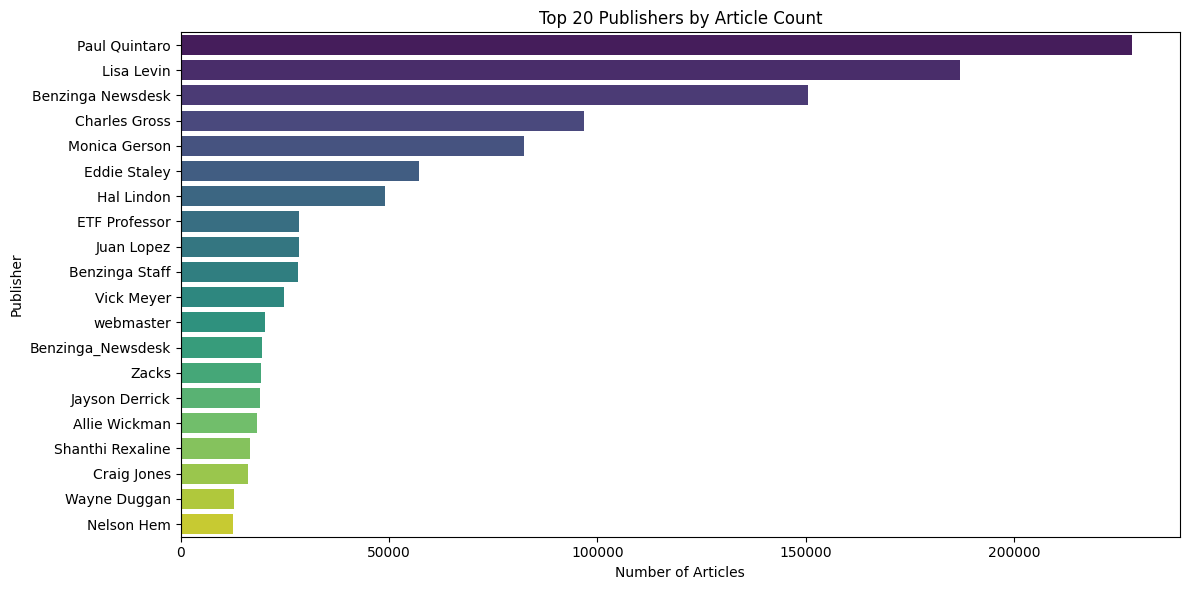

In [153]:
viz.plot_articles_per_publisher()

In [144]:
print("\nWeekday Distribution:")
print(eda.weekday_distribution())


Weekday Distribution:
date
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


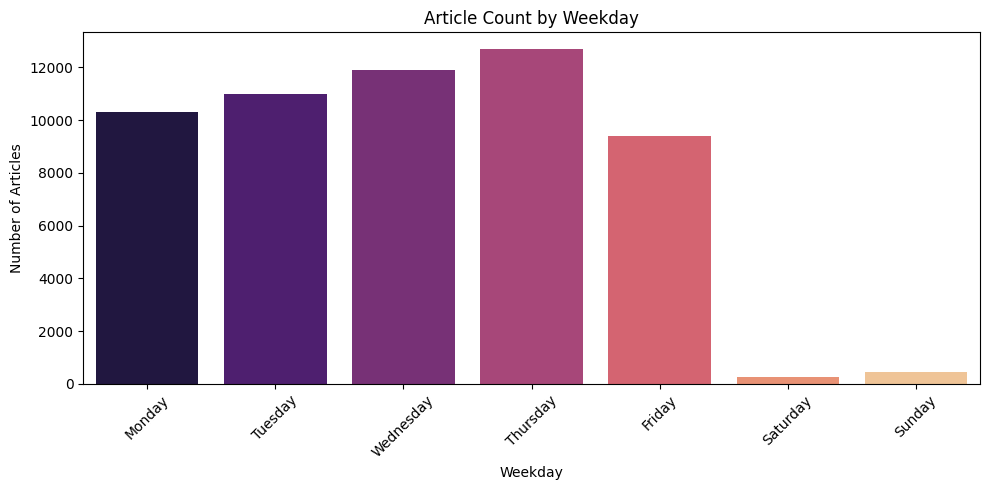

In [154]:
viz.plot_weekday_distribution()

In [145]:
# Publication trends
daily_counts, weekday_distribution = eda.publication_trends()
print("\nDaily Article Counts:")
print(daily_counts.tail())


Daily Article Counts:
date
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, dtype: int64


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64


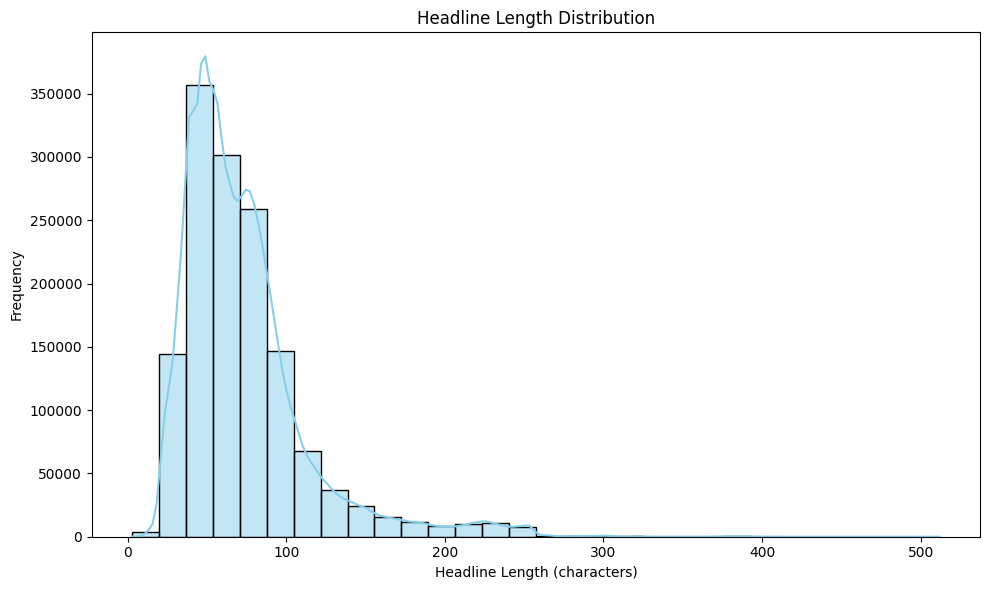

In [155]:
viz.plot_headline_length_distribution()